In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [2]:
url = "https://raw.githubusercontent.com/AnnaNebuko/ABD-PRJ-25-2team-HAPPINESS/main/data_cleaned.csv"
df = pd.read_csv(url)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,nwspol,pplfair,health,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,50030,21.0,0.0,2.0,7.0,9.0,AT,90.0,0.0,2.0,...,2.0,2.0,6.0,6.0,4.0,1.0,1.0,2.0,7.0,10.0
1,50057,53.0,8.0,2.0,4.0,9.0,AT,30.0,9.0,1.0,...,4.0,3.0,7.0,5.0,8.0,4.0,1.0,6.0,6.0,5.0
2,50106,78.0,6.0,3.0,6.0,7.0,AT,15.0,6.0,3.0,...,2.0,3.0,5.0,6.0,9.0,3.0,2.0,4.0,6.0,5.0
3,50145,64.0,1.0,2.0,5.0,9.0,AT,60.0,3.0,2.0,...,1.0,3.0,6.0,8.0,8.0,5.0,1.0,6.0,8.0,9.0
4,50158,59.0,3.0,2.0,6.0,8.0,AT,120.0,8.0,1.0,...,3.0,3.0,3.0,5.0,7.0,5.0,1.0,4.0,3.0,3.0


In [3]:
df['happy'] = df['happy'].astype(int)

X = df.drop(['happy','idno'], axis=1)
y = df['happy']

In [4]:
# закодируем категориальные признаки
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)


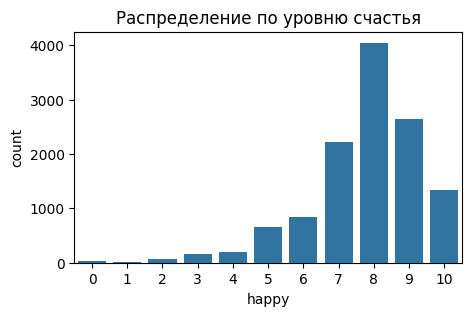

In [5]:
fig = plt.figure(figsize=(5, 3))

sns.countplot(data=df, x='happy')
plt.title('Распределение по уровню счастья')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [7]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


# Создание и обучение модели
ordered_model = OrderedModel(y_train, X_train_scaled_df, distr='logit') 
results_prob = ordered_model.fit(method='bfgs') 

print(results_prob.summary())

Optimization terminated successfully.
         Current function value: 1.516392
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
                             OrderedModel Results                             
Dep. Variable:                  happy   Log-Likelihood:                -14850.
Model:                   OrderedModel   AIC:                         2.982e+04
Method:            Maximum Likelihood   BIC:                         3.027e+04
Date:                Sat, 14 Jun 2025                                         
Time:                        11:25:32                                         
No. Observations:                9793                                         
Df Residuals:                    9731                                         
Df Model:                          52                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [8]:
# Создаем DataFrame из параметров модели
df_results = pd.DataFrame({
    'coef': results_prob.params,
    'std_err': results_prob.bse,
    'z_value': results_prob.tvalues,
    'p_value': results_prob.pvalues,
    'ci_lower': results_prob.conf_int()[0],
    'ci_upper': results_prob.conf_int()[1]
})

# Добавляем названия переменных
df_results.index = results_prob.model.exog_names


df_results[:-10].sort_values('coef').head(10)

,coef,std_err,z_value,p_value,ci_lower,ci_upper
health,-0.328091,0.023210,-14.135877,2.282738e-45,-0.373581,-0.282601
fltdpr,-0.273538,0.023679,-11.551924,7.218586e-31,-0.319948,-0.227128
cntry_GR,-0.250812,0.025074,-10.003057,1.477643e-23,-0.299956,-0.201669
fltlnl,-0.235138,0.021927,-10.723521,7.893971e-27,-0.278114,-0.192161
hincfel,-0.205114,0.021871,-9.378323,6.703040e-21,-0.247981,-0.162248
cntry_FR,-0.163840,0.027287,-6.004307,1.921513e-09,-0.217322,-0.110359
iphlppla,-0.132409,0.020417,-6.485185,8.862301e-11,-0.172425,-0.092392
cntry_CY,-0.132109,0.022574,-5.852265,4.849240e-09,-0.176353,-0.087864
gndr_1,-0.118666,0.027597,-4.299892,1.708815e-05,-0.172755,-0.064576
impfuna,-0.091824,0.021684,-4.234659,2.288991e-05,-0.134323,-0.049324


In [9]:
df_results[:-10].sort_values('coef', ascending=False).head(10)

,coef,std_err,z_value,p_value,ci_lower,ci_upper
enjlf,0.652353,0.022734,28.695613,4.327821e-181,0.607796,0.696909
stfeco,0.250904,0.026518,9.461775,3.027583e-21,0.198930,0.302878
atchctr,0.221685,0.021859,10.141719,3.606953e-24,0.178843,0.264527
trstplc,0.169131,0.027186,6.221316,4.930023e-10,0.115848,0.222414
pplfair,0.129676,0.021671,5.983834,2.179453e-09,0.087202,0.172151
agea,0.124997,0.025307,4.939142,7.846707e-07,0.075395,0.174599
hhmmb,0.123538,0.021074,5.862040,4.572148e-09,0.082233,0.164843
cptppola,0.107342,0.025862,4.150632,3.315581e-05,0.056654,0.158030
stfedu,0.081802,0.024669,3.315964,9.132755e-04,0.033452,0.130153
sclmeet,0.079174,0.020258,3.908325,9.293807e-05,0.039469,0.118878


Коэффициенты показывают, как изменение предиктора на 1 единицу влияет на логарифм шансов (log-odds) оказаться в более высокой категории счастья.

- Самые значимые положительные факторы (p<0.05):

enjlf (0.652) - Удовольствие от жизни

stfeco (0.251) - Удовлетворенность экономикой

atchctr (0.221) - Привязанность к стране

trstplc (0.169) - Доверие полиции

pplfair (0.13) - Вера в честность людей

- Самые значимые отрицательные факторы:

health (-0.328) - Плохое здоровье

fltdpr (-0.273) - Чувство депрессии

cntry_GR (-0.25) - Проживание в Греции

fltlnl (-0.235) - Чувство одиночества

hincfel (-0.205) - Финансовые трудности

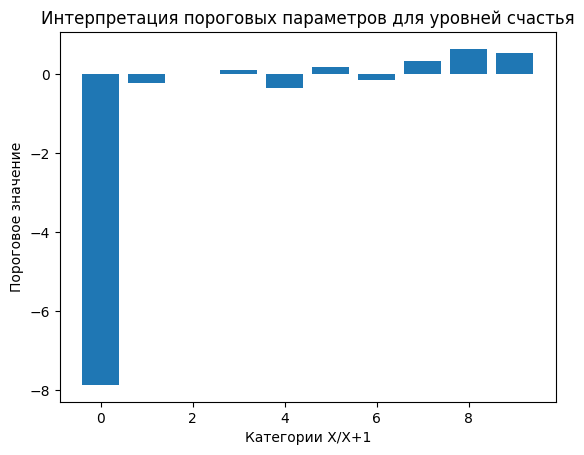

In [10]:
# Интерпретация пороговых параметров
thresholds = results_prob.params[-10:]  # Последние 10 параметров — пороги
plt.bar(range(10), thresholds)
plt.title('Интерпретация пороговых параметров для уровней счастья')
plt.xlabel("Категории X/X+1")
plt.ylabel("Пороговое значение")
plt.show()

In [21]:
thresholds

0/1    -7.872443
1/2    -0.229005
2/3     0.001598
3/4     0.100544
4/5    -0.353441
5/6     0.177699
6/7    -0.136964
7/8     0.342326
8/9     0.639905
9/10    0.524313
dtype: float64

Самый резкий переход:

0/1 = -7.87 — огромный отрицательный порог. Это означает, что люди очень редко выбирают категорию 0 (крайняя несчастливость), и даже минимальные значения предикторов "переводят" их в категорию 1.

8/9 = 0.64 — самый большой положительный скачок. Переход от 8 к 9 требует значительно более высоких значений предикторов (например, очень сильного удовольствия от жизни enjlf).

Самые значимые пороги (p < 0.001):

4/5 = -0.35 — барьер между "умеренно несчастливыми" (4) и "нейтральными" (5).

5/6 = 0.17 — переход от "нейтральных" (5) к "слегка счастливым" (6).

7/8 = 0.34 и 8/9 = 0.640 — требуют максимальных усилий для перехода между высокими уровнями счастья.

Незначимые пороги (p > 0.05): 1/2, 2/3, 3/4. Это означает, что разница между этими категориями слабо выражена, и модель плохо их разделяет.

In [12]:
# Сделаем предсказание вероятности уровня счастья
predicted = results_prob.model.predict(results_prob.params, X_test_scaled)

# Выберем наиболее высокую вероятность уровня
y_pred = [np.argmax(x) for x in predicted]

print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy:0.3875051041241323
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        13
           3       0.31      0.12      0.17        33
           4       0.00      0.00      0.00        41
           5       0.26      0.21      0.23       133
           6       0.00      0.00      0.00       168
           7       0.28      0.27      0.27       444
           8       0.42      0.72      0.53       810
           9       0.42      0.33      0.37       530
          10       0.48      0.15      0.23       268

    accuracy                           0.39      2449
   macro avg       0.29      0.18      0.19      2449
weighted avg       0.35      0.39      0.34      2449



c:\Users\senm\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\senm\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\senm\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Выводы-----

In [13]:
# Объединим уровень счастья в категории
df['happiness_group'] = pd.cut(
    df['happy'],  
    bins=[-1, 4, 8, 10],  
    labels=[0, 1, 2]  # Границы: 0-'low', 1-'medium', 2-'high'
)

print(df['happiness_group'].value_counts(normalize=True))

happiness_group
1    0.634700
2    0.326091
0    0.039209
Name: proportion, dtype: float64


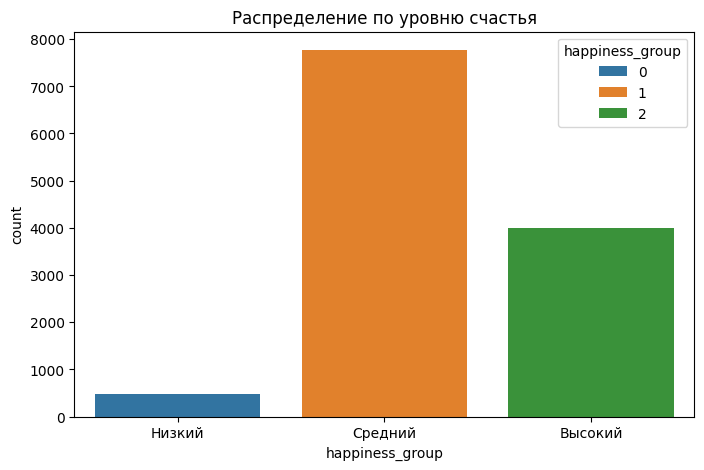

In [14]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='happiness_group', hue='happiness_group')
plt.title('Распределение по уровню счастья')
plt.xticks(ticks=[0, 1, 2], labels=['Низкий', 'Средний', 'Высокий'])
plt.show()

In [15]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, df['happiness_group'], test_size=0.2, stratify=df['happiness_group'], random_state=42)

scaler = StandardScaler()
X_train_scaled_cat = scaler.fit_transform(X_train_cat)
X_test_scaled_cat = scaler.transform(X_test_cat)

X_train_scaled_cat_df = pd.DataFrame(X_train_scaled_cat, columns=X.columns, index=X_train_cat.index)
X_test_scaled_cat_df = pd.DataFrame(X_test_scaled_cat, columns=X.columns, index=X_test_cat.index)



In [16]:
# Создание и обучение модели с категориями

ord_model_cat = OrderedModel(y_train_cat, X_train_scaled_cat_df, distr='logit')
results_cat = ord_model_cat.fit(method='bfgs') 

print(results_cat.summary())


Optimization terminated successfully.
         Current function value: 0.616211
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41
                             OrderedModel Results                             
Dep. Variable:        happiness_group   Log-Likelihood:                -6034.6
Model:                   OrderedModel   AIC:                         1.218e+04
Method:            Maximum Likelihood   BIC:                         1.257e+04
Date:                Sat, 14 Jun 2025                                         
Time:                        11:25:40                                         
No. Observations:                9793                                         
Df Residuals:                    9739                                         
Df Model:                          52                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [17]:
# Создаем DataFrame из параметров модели
df_results_cat = pd.DataFrame({
    'coef': results_cat.params,
    'std_err': results_cat.bse,
    'z_value': results_cat.tvalues,
    'p_value': results_cat.pvalues,
    'ci_lower': results_cat.conf_int()[0],
    'ci_upper': results_cat.conf_int()[1]
})

# Добавляем названия переменных
df_results_cat.index = results_cat.model.exog_names



In [28]:
# Посмотрим веса статзначимых предикторов
mask = df_results_cat['p_value'] < 0.05

predictors = df_results_cat[mask][:-2].sort_values('coef', ascending=False)

predictors

,coef,std_err,z_value,p_value,ci_lower,ci_upper
enjlf,0.656943,0.028750,22.850078,1.458782e-115,0.600593,0.713292
atchctr,0.240908,0.027677,8.704125,3.200336e-18,0.186661,0.295155
stfeco,0.210297,0.032628,6.445204,1.154448e-10,0.146346,0.274248
hhmmb,0.155622,0.026410,5.892540,3.803041e-09,0.103859,0.207384
trstplc,0.138147,0.033152,4.167110,3.084862e-05,0.073171,0.203123
agea,0.134367,0.031808,4.224304,2.396799e-05,0.072025,0.196710
stfedu,0.132542,0.030143,4.397154,1.096798e-05,0.073463,0.191621
cntry_DE,0.103368,0.035750,2.891383,3.835498e-03,0.033298,0.173437
cptppola,0.094457,0.032095,2.943021,3.250262e-03,0.031551,0.157363
pplfair,0.091553,0.026500,3.454862,5.505741e-04,0.039615,0.143492


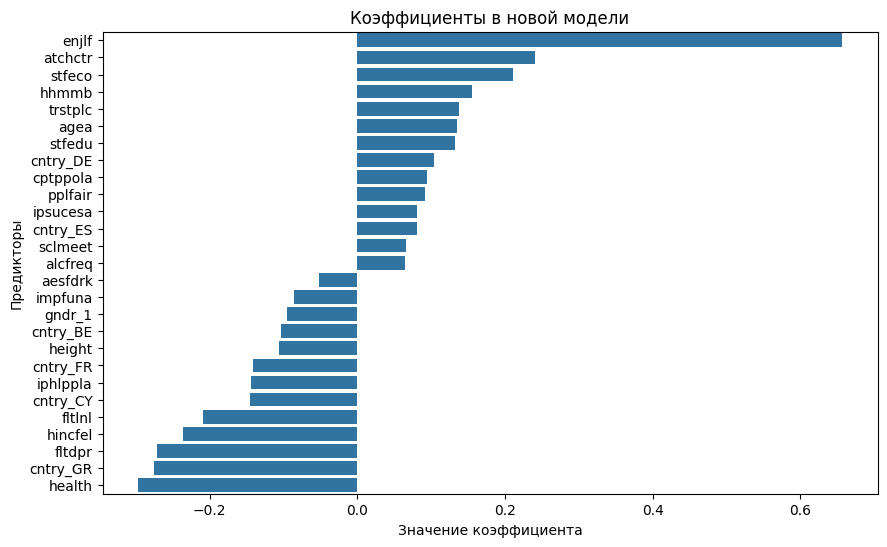

In [30]:
# Визуализация изменений
plt.figure(figsize=(10,6))
sns.barplot(x=predictors['coef'], y=predictors.index)
plt.title('Коэффициенты в новой модели')
plt.xlabel('Значение коэффициента')
plt.ylabel('Предикторы')
plt.show()

Log-Likelihood: -6034.6 (лучше, чем в исходной модели с 10 уровнями)

Пороговые значения:

low/medium: -4.2374 (p<0.05) — резкий переход между низким и средним уровнем

medium/high: 1.6671 (p<0.05) — значимый, но менее выраженный скачок к высокому уровню

In [19]:
columns_no_stat = df_results_cat[df_results_cat['p_value'] >= 0.05].index.to_list()
print(f'Признаки, не имеющие статзначимость:\n {columns_no_stat}')


Признаки, не имеющие статзначимость:
 ['rlgdgr', 'polintr', 'nwspol', 'dscrgrp', 'pray', 'impdiffa', 'impsafea', 'slprl', 'dosprt', 'cgtsmok', 'weighta', 'fnsdfml', 'cnfpplh', 'paccnt', 'emplrel', 'uempla', 'actrolga', 'trstprl', 'trstlgl', 'trstplt', 'vote', 'stfdem', 'cntry_CH', 'cntry_FI', 'cntry_GB']


In [20]:
predicted_cat = results_cat.model.predict(results_cat.params, np.array(X_test_scaled_cat_df))
y_pred_cat = [np.argmax(x) for x in predicted_cat]


print(f'Accuracy:{accuracy_score(y_test_cat, y_pred_cat)}')
print(classification_report(y_test_cat, y_pred_cat))

Accuracy:0.7109024091465904
              precision    recall  f1-score   support

           0       0.58      0.15      0.23        96
           1       0.73      0.86      0.79      1554
           2       0.65      0.49      0.56       799

    accuracy                           0.71      2449
   macro avg       0.66      0.50      0.53      2449
weighted avg       0.70      0.71      0.69      2449



## Выводы